# K-Means Clustering

In this exercise we generate an artificial dataset in order to employ the k-means method for clustering the data. We will consider a 2D and a 3D example.

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics

## 2D Example

In [2]:
from sklearn.datasets import make_blobs

X_2dBlobs, y = make_blobs(n_samples=3000, n_features=2, centers=5)
print(X_2dBlobs.shape)

(3000, 2)


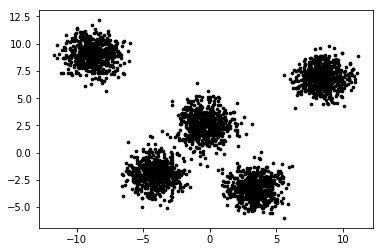

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X_2dBlobs[:, 0], X_2dBlobs[:, 1], c='black', s=7)
plt.show()

##### Apply k-means Algorithm from scilearn.

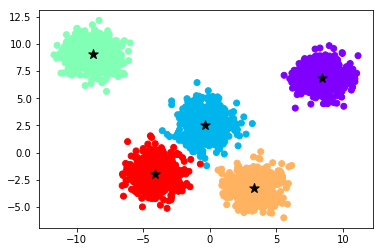

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(X_2dBlobs)

plt.scatter(X_2dBlobs[:,0],X_2dBlobs[:,1], c=kmeans.labels_, 
            cmap='rainbow') 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker='*', c='#050505', s=100)
plt.show()

## 3D Example

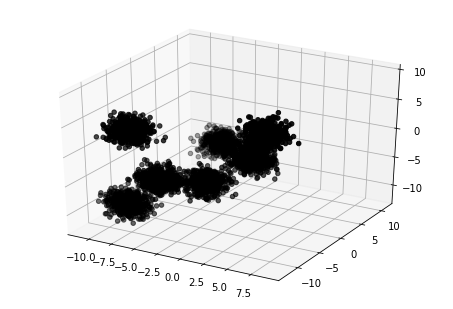

In [5]:
from mpl_toolkits.mplot3d import Axes3D

X_3dBlobs, y = make_blobs(n_samples=4000, n_features=3, centers=7)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_3dBlobs[:, 0], X_3dBlobs[:, 1], X_3dBlobs[:, 2], c='black')
plt.show()

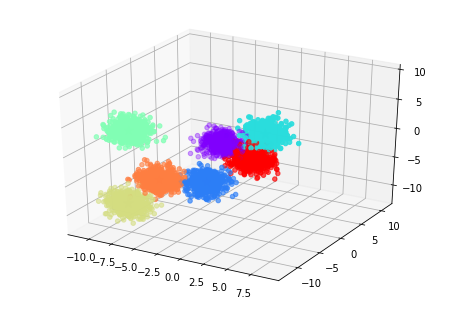

In [6]:
kmeans = KMeans(n_clusters=7)
kmeans = kmeans.fit(X_3dBlobs)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_3dBlobs[:, 0], X_3dBlobs[:, 1], X_3dBlobs[:, 2], 
           c=kmeans.labels_, cmap='rainbow')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
           kmeans.cluster_centers_[:, 2], marker='*', c='#050505', s=100)
plt.show()

### Q: This is too good to be true! What are the issues?

###### "Correct" choice of K (Elbow method)

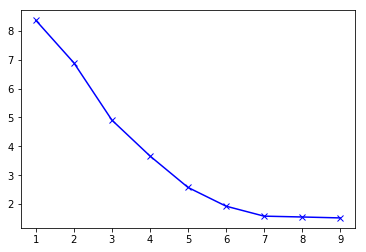

In [7]:
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmean = KMeans(n_clusters=k)
    kmean.fit(X_3dBlobs)
    distortions.append(
        sum(np.min(cdist(
            X_3dBlobs, kmean.cluster_centers_,
                'euclidean'), axis=1)) / X_3dBlobs.shape[0])

plt.plot(K, distortions, 'bx-')
plt.show()

###### Strong assumptions on data set.

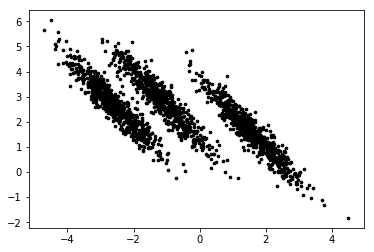

In [8]:
X, y = make_blobs(n_samples=2000, n_features=2, centers=3, random_state=3)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
                  
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c='black', s=7)
plt.show()

### Q: What do we expect?

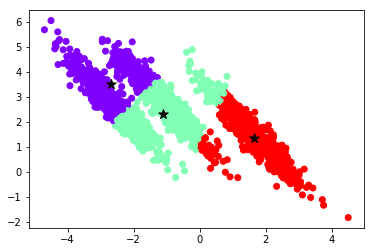

In [9]:
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(X_aniso)

plt.scatter(X_aniso[:,0],X_aniso[:,1], c=kmeans.labels_, 
            cmap='rainbow') 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker='*', c='#050505', s=100)
plt.show()

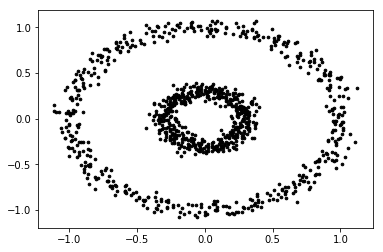

In [10]:
from sklearn.datasets import make_circles

X_circles, y = make_circles(n_samples = 1000, factor=0.3, random_state=0, noise=0.05)

plt.scatter(X_circles[:, 0], X_circles[:, 1], c='black', s=7)
plt.show()

### Q: What do we expect?

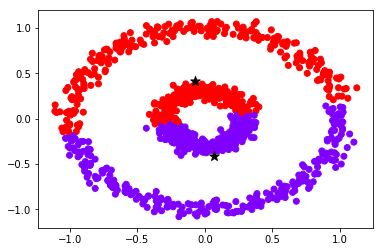

In [11]:
kmeans = KMeans(n_clusters=2)
kmeans = kmeans.fit(X_circles)

plt.scatter(X_circles[:,0],X_circles[:,1], c=kmeans.labels_, 
            cmap='rainbow') 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker='*', c='#050505', s=100)
plt.show()

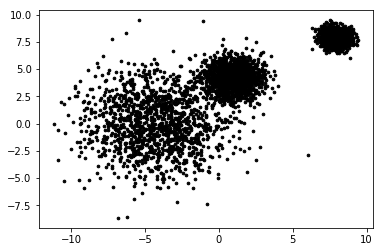

In [13]:
X_varied, y = make_blobs(n_samples=4000, cluster_std=[1.0, 2.5, 0.5], random_state=3)

plt.scatter(X_varied[:, 0], X_varied[:, 1], c='black', s=7)
plt.show()

### Q: What do we expect?

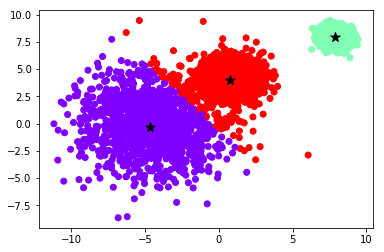

In [14]:
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(X_varied)

plt.scatter(X_varied[:,0],X_varied[:,1], c=kmeans.labels_, 
            cmap='rainbow') 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker='*', c='#050505', s=100)
plt.show()

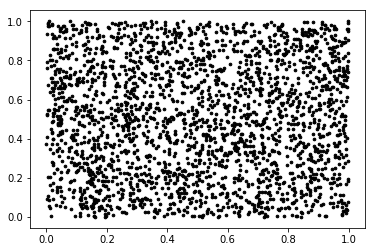

In [15]:
X_noStructure = np.random.rand(2500, 2)

plt.scatter(X_noStructure[:, 0], X_noStructure[:, 1], c='black', s=7)
plt.show()

### Q: What do we expect?

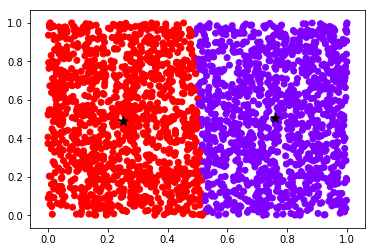

In [17]:
kmeans = KMeans(n_clusters=2)
kmeans = kmeans.fit(X_noStructure)

plt.scatter(X_noStructure[:,0],X_noStructure[:,1], c=kmeans.labels_, 
            cmap='rainbow') 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker='*', c='#050505', s=100)
plt.show()

## A real world example

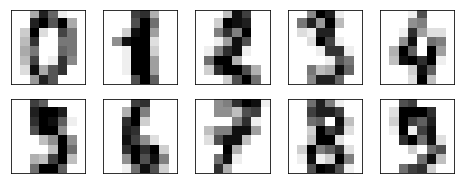

In [19]:
from sklearn.datasets import load_digits
digits = load_digits()

#print(digits.DESCR)

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
for axi, k in zip(ax.flat, range(0,10)):
    axi.set(xticks=[], yticks=[])
    axi.imshow(digits.images[k], cmap=plt.cm.binary, interpolation='nearest')
plt.show()


In [20]:
from scipy.stats import mode

kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
    
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.79354479688369506

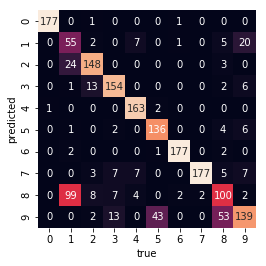

In [22]:
import seaborn as sns;
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true')
plt.ylabel('predicted');
plt.show()

### Q: What do we observe?

### Q: How can we interpret this result?

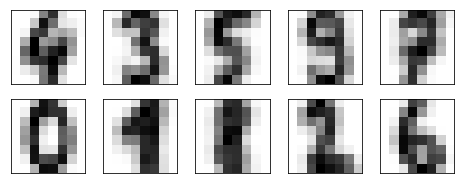

In [23]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
plt.show()